PROJETO DE AM 2020.1 

Disciplina: Aprendizagem de Máquina  

Professores: Evandro Costa e Xu Yang 

Alunos: Demétrios Reis Costa, Flávio Oscar Hahn e Mauricésar Junior

Este trabalho tem como finalidade avaliar os algoritmos bem como as compara-los afim de termos uma análise precisa e detalhada. A base de dados selecionada pode ser encontrada em: 


```
(https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease#
```








1ª Etapa-Análise: 
* 1. Realizar uma Análise Exploratória 
* 2. Investir em Pré-processamento  

2ª Etapa- Single: 
* 1. KNN 
* 2. Árvore de decisão 
* 3. SVM 
* 4. Rede Neural 
* 5. Naive Bayes 
* 6. Avaliar o desempenho de cada algoritmo (escolher a métrica) 

3ª Etapa- Incluir Redução de dimensionalidade: 
* 1. KNN 
* 2. Árvore de decisão 
* 3. SVM 
* 4. Rede Neural 
* 5. Naive Bayes 
* 6. Avaliar o desempenho de cada algoritmo (escolher a métrica) 

4ª Etapa- Aplicar balanceamento: 
* 1. KNN 
* 2. Árvore de decisão 
* 3. SVM 
* 4. Rede Neural 
* 5. Nave Bayes
* 6. Avaliar o desempenho de cada algoritmo (escolher a métrica) 
* 7. Realizar uma comparação entre os modelos classificadores. 

5ª Etapa- Ensemble boosting: 
* 1. Realizar combinação de três ou mais classificadores buscando um  desempenho melhor que a versão single dos classificadores 
* 2. Avaliar o desempenho de cada algoritmo (escolher a métrica) 
* 3. Realizar uma comparação entre os modelos classificadores.




In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

url1 = 'https://raw.githubusercontent.com/flaviohahn/ApMaquina/master/teste.csv'

data_frame = pd.read_csv(url1, error_bad_lines=False)

data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


  1ª Etapa: análise exploratória e pré-processamento de  dados:
* Verificação de instâncias com atributos nulos,
* Redução  de dimensionalidade (usar o PCA e  pelo menos mais uma técnica comparando-as)
* balanceamento de classes (justificar  a escolhar da técnica adotada)

In [ ]:
data_frame = data_frame.replace({'?': None }) 
data_frame = data_frame.fillna(value=np.nan)

In [ ]:
data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


Como podemos observar essa base de dados voltada para à área da saúde onde suas classes representam um dado relativo a saúde do indivíduo. Assim temos:

   ID        | Classe  | Siginificado | Formato do dado
    :------: |:------ | -----------: |  ------: 
         1   |age      | idade                           | idade em anos
         2   |bp       | pressão arterial                | Blood Pressure(numerical) bp in mm/Hg
         3   |sg       | gravidade específica            | Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
         4   |al       | albumina                        | Albumin(nominal)al - (0,1,2,3,4,5)
         5   |su       | açúcar                          | Sugar(nominal) su - (0,1,2,3,4,5)
         6   |rbc      | glóbulos vermelhos              | Red Blood Cells(nominal) rbc - (normal,abnormal)
         7   |pc       | célula pus                      | Pus Cell (nominal) pc - (normal,abnormal)
         8   |pcc      | aglomerados de células de pus   | Pus Cell clumps(nominal) pcc - (present,notpresent)
         9   |ba       | bactéria                        | Bacteria(nominal) ba - (present,notpresent)
        10   |bgr      | glicose no sangue aleatória     | Blood Glucose Random(numerical) bgr in mgs/dl
        11   |bu       | uréia sanguínea                 | Blood Urea(numerical) bu in mgs/dl
        12   |sc       | creatinina sérica               | Serum Creatinine(numerical) sc in mgs/dl
        13   |grama    | sódio potássio                  | Sodium(numerical) sod in mEq/L
        14   |hemo     | hemoglobina                     | Potassium(numerical) pot in mEq/L
        15   |pcv      | volume de células compactadas   | Packed Cell Volume(numerical)
        16   |wc       | contagem de leucócitos          | White Blood Cell Count(numerical) wc in cells/cumm
        17   |rc       | contagem de glóbulos vermelhos  | Red Blood Cell Count(numerical) rc in millions/cmm
        18   |htn      | hipertensão                     | Hypertension(nominal) htn - (yes,no)
        19   |dm       | diabetes mellitus               | Diabetes Mellitus(nominal) dm - (yes,no)
        20   |cad      | doença arterial coronariana     | Coronary Artery Disease(nominal) cad - (yes,no)
        21   |apetite  | apetite                         | Appetite(nominal) appet - (good,poor)
        22   |pe       | edema pedal                     | Pedal Edema(nominal) pe - (yes,no)
        23   |ane      | anemia                          | Anemia(nominal)ane - (yes,no)
        24   |classe   | classe                          | Class (nominal) class - (ckd,notckd)


In [ ]:
#aplicando a média ao age NaN
data_frame[['age']] = data_frame[['age']].apply(pd.to_numeric)
data_frame['age'] = data_frame['age'].fillna((data_frame['age'].mean()))

#aplicando a média ao bp NaN
data_frame[['bp']] = data_frame[['bp']].apply(pd.to_numeric)
data_frame['bp'] = data_frame['bp'].fillna((data_frame['bp'].mean()))

#aplicando a média ao sg NaN
data_frame[['sg']] = data_frame[['sg']].apply(pd.to_numeric)
data_frame['sg'] = data_frame['sg'].fillna((data_frame['sg'].mean()))

#aplicando a média ao al NaN
data_frame[['al']] = data_frame[['al']].apply(pd.to_numeric)
data_frame['al'] = data_frame['al'].fillna((data_frame['al'].mean()))

#aplicando a média ao su NaN
data_frame[['su']] = data_frame[['su']].apply(pd.to_numeric)
data_frame['su'] = data_frame['su'].fillna((data_frame['su'].mean()))

#aplicando a média ao rbcc columns NaN
data_frame[['rbcc']] = data_frame[['rbcc']].apply(pd.to_numeric)
data_frame['rbcc'] = data_frame['rbcc'].fillna((data_frame['rbcc'].mean()))

#aplicando a média ao sod columns NaN
data_frame[['sod']] = data_frame[['sod']].apply(pd.to_numeric)
data_frame['sod'] = data_frame['sod'].fillna((data_frame['sod'].mean()))

#aplicando a média ao pot columns NaN
data_frame[['pot']] = data_frame[['pot']].apply(pd.to_numeric)
data_frame['pot'] = data_frame['pot'].fillna((data_frame['pot'].mean()))

#aplicando a média ao bgr columns NaN
data_frame[['bgr']] = data_frame[['bgr']].apply(pd.to_numeric)
data_frame['bgr'] = data_frame['bgr'].fillna((data_frame['bgr'].mean()))

#aplicando normal ao rbc NaN
data_frame.rbc = data_frame.rbc.fillna('normal')

#aplicando normal ao pc NaN
data_frame.pc = data_frame.pc.fillna('normal')

In [ ]:
data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36,1.2,137.528754,4.627244,15.4,44,7800,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18,0.8,137.528754,4.627244,11.3,38,6000,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53,1.8,137.528754,4.627244,9.6,31,7500,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56,3.8,111.000000,2.500000,11.2,32,6700,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26,1.4,137.528754,4.627244,11.6,35,7300,4.600000,no,no,no,good,no,no,ckd


In [ ]:
# renomeando class(palavra reservada) por classification 
data_frame.rename(columns={'class': 'classification'}, inplace=True)

In [ ]:
data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36,1.2,137.528754,4.627244,15.4,44,7800,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18,0.8,137.528754,4.627244,11.3,38,6000,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53,1.8,137.528754,4.627244,9.6,31,7500,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56,3.8,111.000000,2.500000,11.2,32,6700,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26,1.4,137.528754,4.627244,11.6,35,7300,4.600000,no,no,no,good,no,no,ckd


In [ ]:
data_frame['rbc'] = data_frame.rbc.replace(['normal','abnormal'], ['1', '0'])
data_frame['pc'] = data_frame.pc.replace(['normal','abnormal'], ['1', '0'])
data_frame['pcc'] = data_frame.pcc.replace(['present','notpresent'], ['1', '0'])
data_frame['ba'] = data_frame.ba.replace(['present','notpresent'], ['1', '0'])
data_frame['htn'] = data_frame.htn.replace(['yes','no'], ['1', '0'])
data_frame['dm'] = data_frame.dm.replace(['yes','no'], ['1', '0'])
data_frame['cad'] = data_frame.cad.replace(['yes','no'], ['1', '0'])
data_frame['appet'] = data_frame.appet.replace(['good','poor'], ['1', '0'])
data_frame['pe'] = data_frame.pe.replace(['yes','no'], ['1', '0'])
data_frame['ane'] = data_frame.ane.replace(['yes','no'], ['1', '0'])
data_frame['classification'] = data_frame.classification.replace(['ckd','ckd\t','notckd'], ['1', '1','0'])
data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36,1.2,137.528754,4.627244,15.4,44,7800,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18,0.8,137.528754,4.627244,11.3,38,6000,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53,1.8,137.528754,4.627244,9.6,31,7500,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56,3.8,111.000000,2.500000,11.2,32,6700,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26,1.4,137.528754,4.627244,11.6,35,7300,4.600000,0,0,0,1,0,0,1


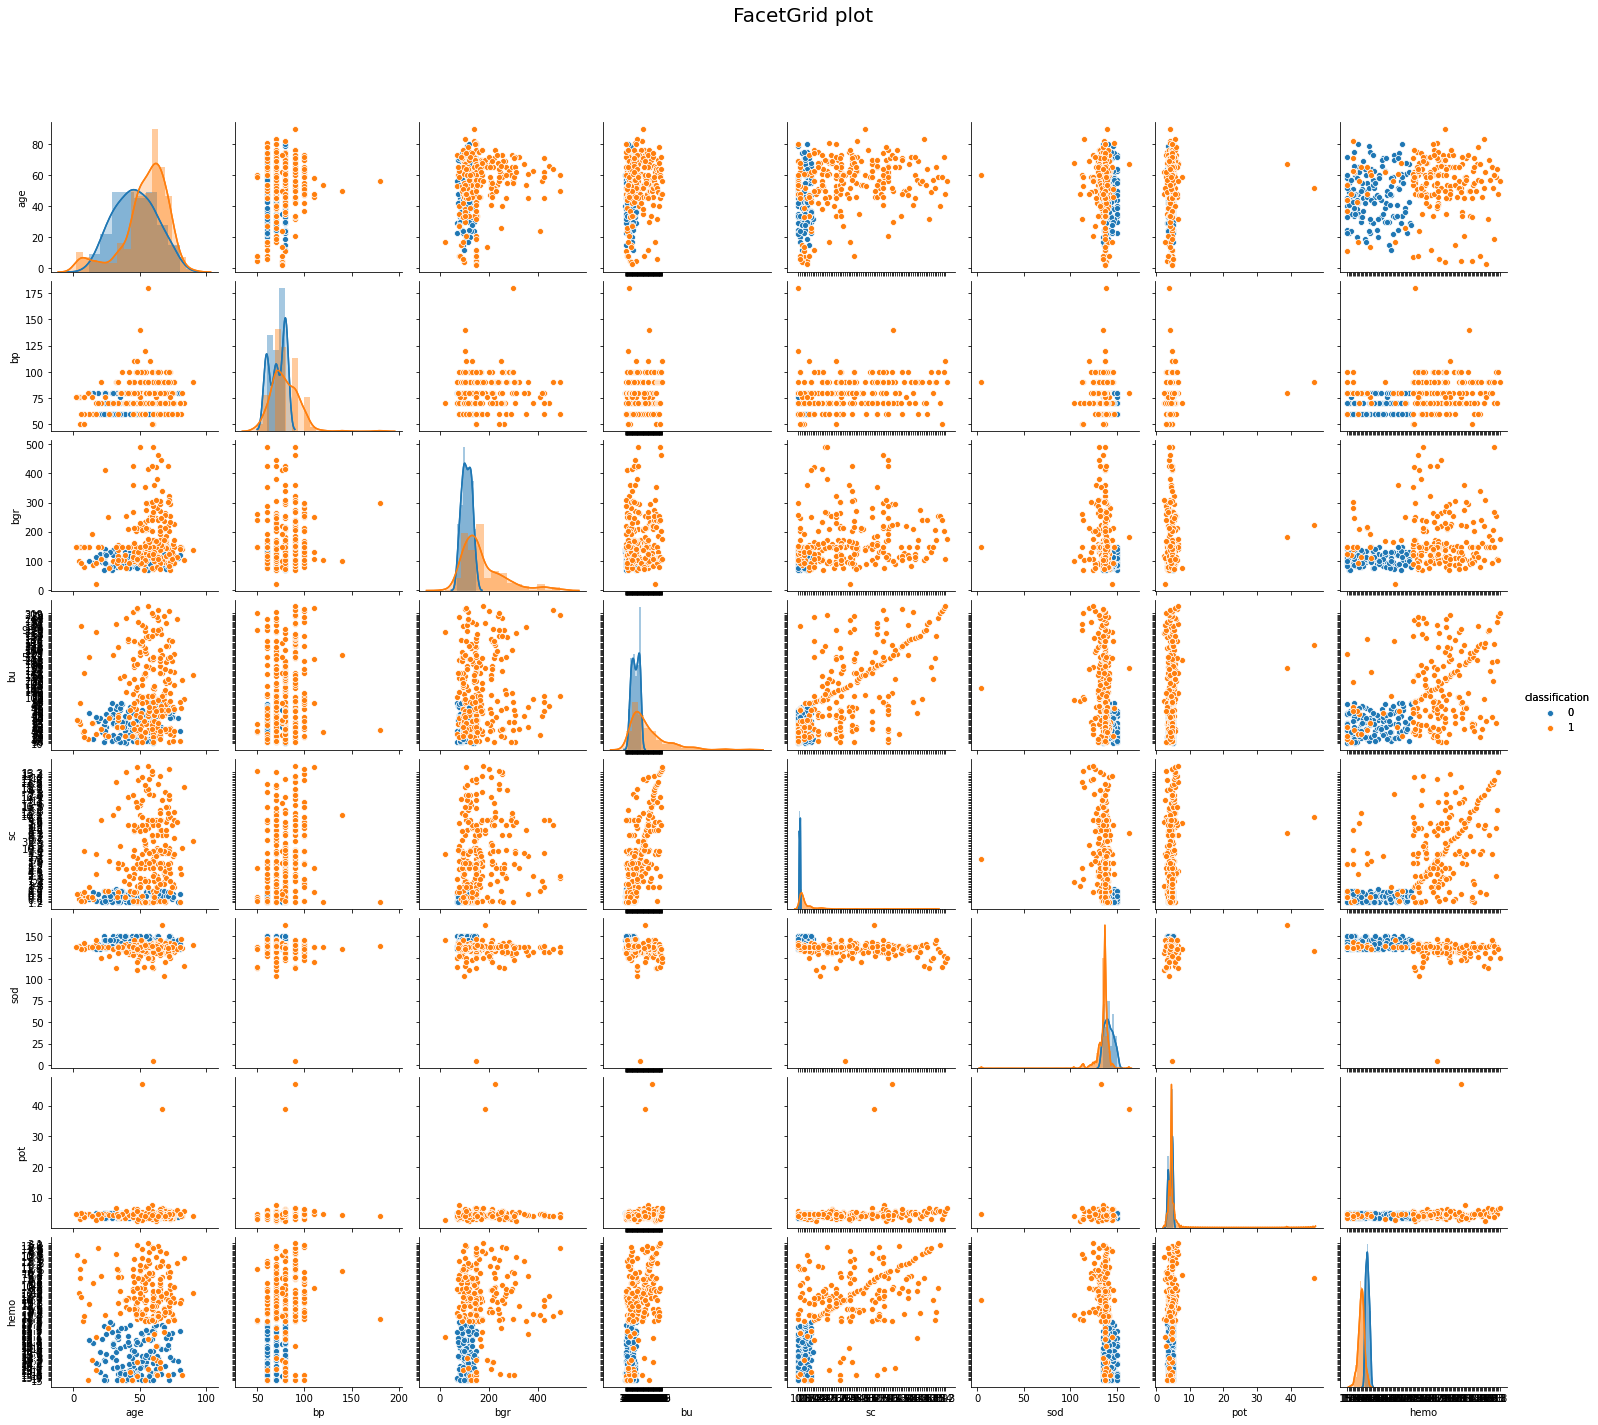

In [ ]:
import seaborn as sns

g = sns.pairplot(data_frame, vars =['age', 'bp','bgr', 'bu', 'sc','sod', 'pot', 'hemo'],hue = 'classification')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

In [ ]:
data_frame = data_frame.interpolate(method='pad')
data_frame.rbc = data_frame.rbc.interpolate(method='pad')
data_frame.pc = data_frame.pc.interpolate(method='pad')
data_frame['rbc'] = data_frame.rbc.replace(['normal','abnormal'], [1,0])
data_frame['pc'] = data_frame.pc.replace(['normal','abnormal'], [1,0])
data_frame['pcc'] = data_frame.pcc.replace(['present','notpresent'], [1,0])
data_frame['ba'] = data_frame.ba.replace(['present','notpresent'], [1,0])
data_frame['htn'] = data_frame.htn.replace(['yes','no'], [1,0])
data_frame['dm'] = data_frame.dm.replace(['yes','no'], [1,0])
data_frame['cad'] = data_frame.cad.replace(['yes','no'], [1,0])
data_frame['appet'] = data_frame.appet.replace(['good','poor'], [1,0])
data_frame['pe'] = data_frame.pe.replace(['yes','no'], [1,0])
data_frame['ane'] = data_frame.ane.replace(['yes','no'], [1,0])
data_frame['classification'] = data_frame.classification.replace(['ckd','ckd\t','notckd'], [1,1,0])
#data_frame['wbcc'] = data_frame.wbcc.replace(['6200.0','8400.0'], [6200,8400])
data_frame = data_frame.dropna(axis=0)
data_frame.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wbcc              0
rbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36,1.2,137.528754,4.627244,15.4,44,7800,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18,0.8,137.528754,4.627244,11.3,38,6000,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53,1.8,137.528754,4.627244,9.6,31,7500,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56,3.8,111.000000,2.500000,11.2,32,6700,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26,1.4,137.528754,4.627244,11.6,35,7300,4.600000,0,0,0,1,0,0,1


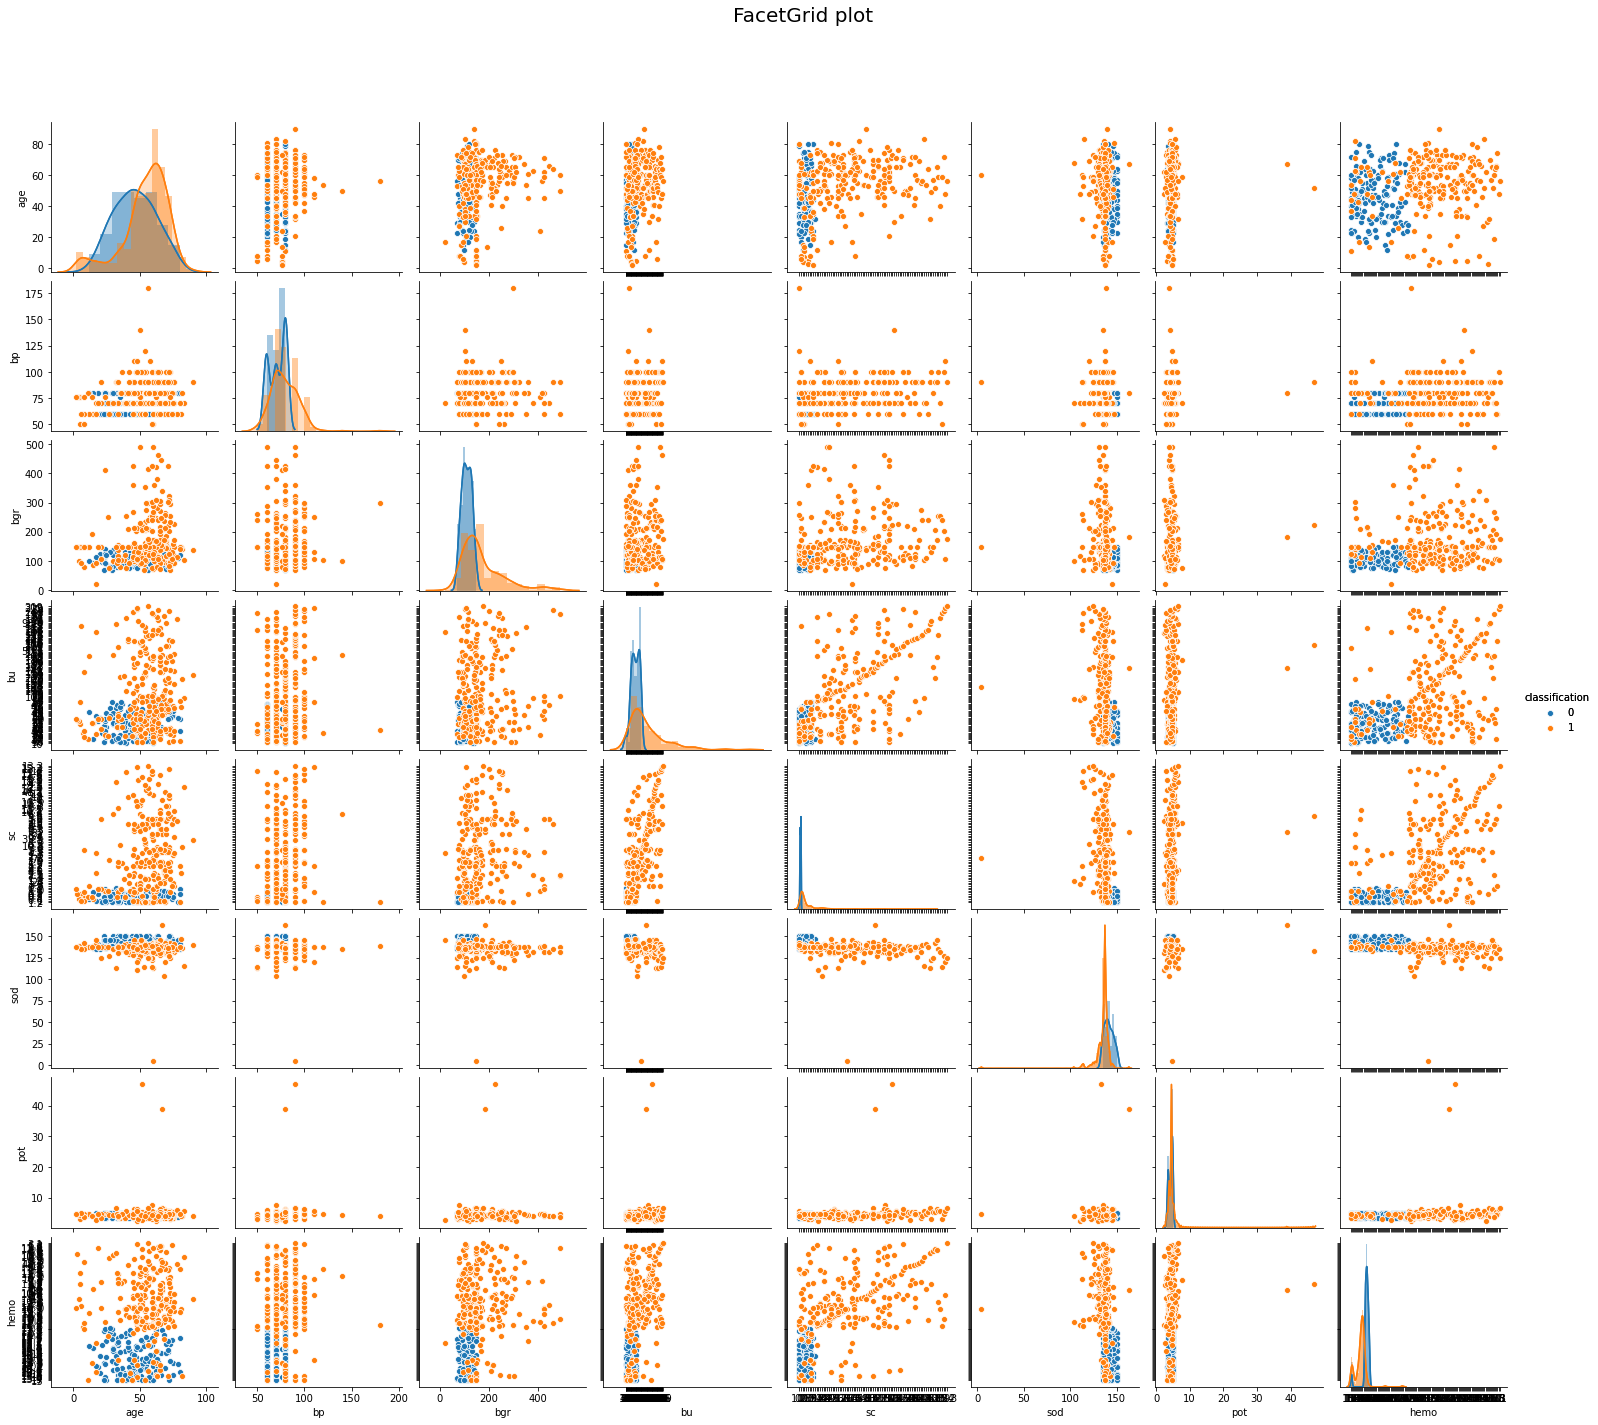

In [ ]:
gg = sns.pairplot(data_frame, vars =['age', 'bp','bgr', 'bu', 'sc','sod', 'pot', 'hemo'],hue = 'classification')
gg.map_diag(sns.distplot)
gg.add_legend()
gg.fig.suptitle('FacetGrid plot', fontsize = 20)
gg.fig.subplots_adjust(top= 0.9);

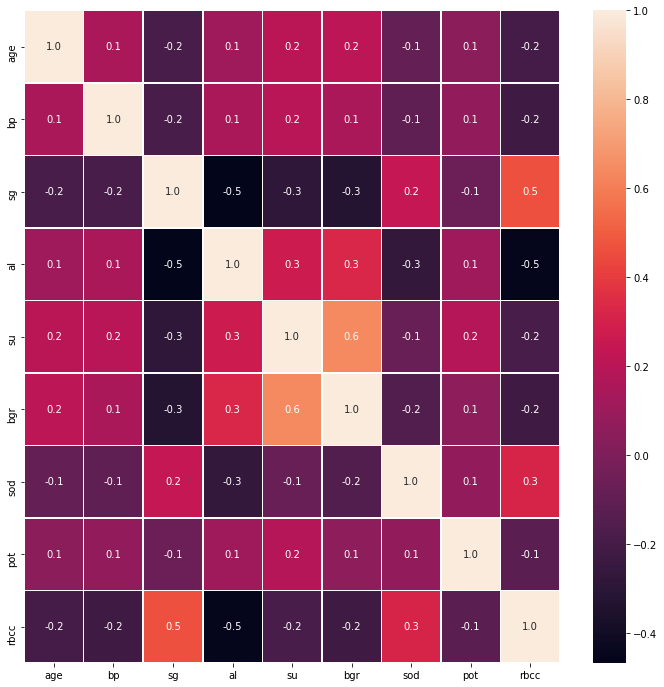

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data_frame.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

2ª Etapa- Single: 
* 1. KNN 
* 2. Árvore de decisão 
* 3. SVM 
* 4. Rede Neural 
* 5. Naive Bayes 
* 6. Avaliar o desempenho de cada algoritmo (escolher a métrica) 

In [ ]:
#I used the knnimputer method for the remaining missing values
#because some features have specific values that's why I didn't get the mean value.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(data_frame)

df2 = pd.DataFrame(data = df_filled)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.metrics import sensitivity_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

from collections import Counter
plt.style.use("seaborn-muted")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
#these variables will be used to show the algorithm name and its successes.
score=[] 
algorithms=[] 
precision=[]
sensitivity=[]
recall=[]
f1score=[]

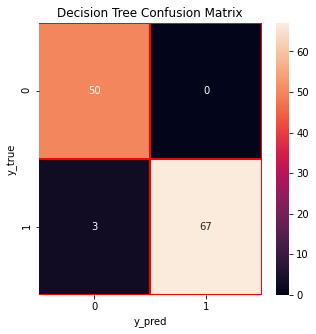

Decision Tree accuracy = 97.5
Decision Tree precision = 97.16981132075472
Decision Tree sensitivity = 97.85714285714286
Decision Tree recall = 97.85714285714286
Decision Tree f1 score = 97.81021897810218


In [ ]:
from sklearn.tree import DecisionTreeClassifier

y = df2[24].values
x_data=df2.drop([24],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

dt = DecisionTreeClassifier(criterion="entropy", max_depth = 5, random_state=1)
dt.fit(x_train,y_train)


#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("Decision Tree accuracy =",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)
algorithms.append("Decision Tree")

print("Decision Tree precision =",precision_score(y_true, y_pred, average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Decision Tree sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Decision Tree recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Decision Tree f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)


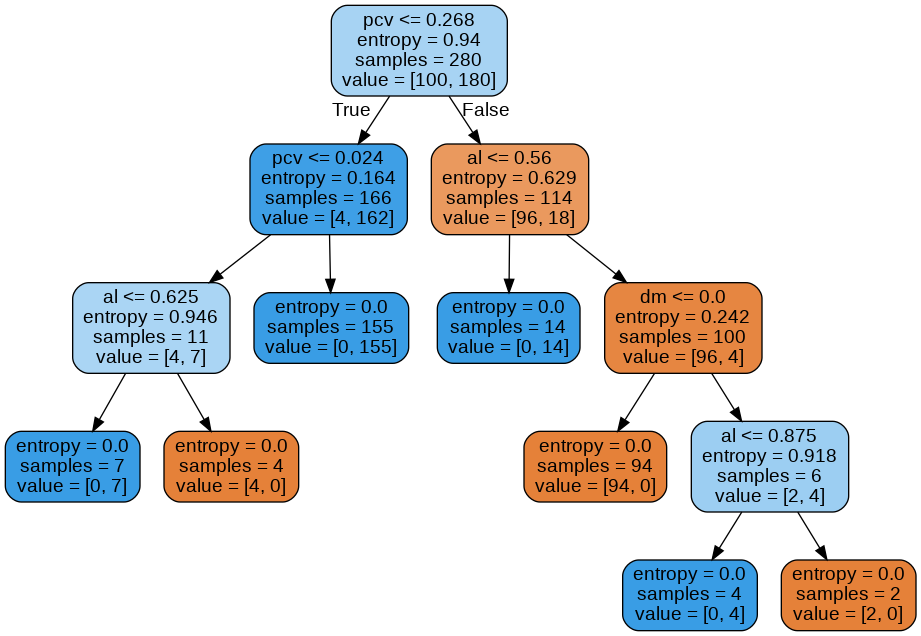

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'

features = list(df.columns[1:])
features

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data,feature_names = features,filled = True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

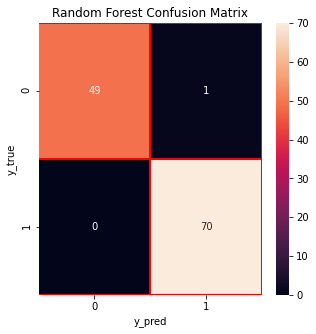

Random Forest accuracy = 99.16666666666667
Random Forest precision = 99.29577464788733
Random Forest sensitivity = 99.0
Random Forest recall = 99.0
Random Forest f1 score = 99.29078014184397


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()
print("Random Forest accuracy =",rf.score(x_test,y_test)*100)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")

print("Random Forest precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

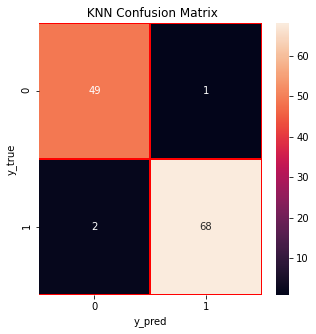

KNN accuracy = 97.5
KNN precision = 97.3145780051151
KNN sensitivity = 97.57142857142857
KNN recall = 97.57142857142857
KNN f1 score = 97.84172661870504


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

y=df2[24].values
x_data=df2.drop([24],axis=1)

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)


#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()

print("KNN accuracy =",knn.score(x_test,y_test)*100)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")

print("KNN precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("KNN sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("KNN recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("KNN f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

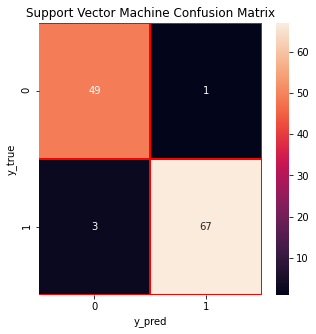

SVM accuracy = 96.66666666666667
SVM precision = 96.38009049773756
SVM sensitivity = 96.85714285714286
SVM recall = 96.85714285714286
SVM f1 score = 97.10144927536231


In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

print("SVM accuracy =",svm.score(x_test,y_test)*100)
score.append(svm.score(x_test,y_test)*100)
algorithms.append("Support Vector Machine")

print("SVM precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("SVM sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("SVM recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("SVM f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

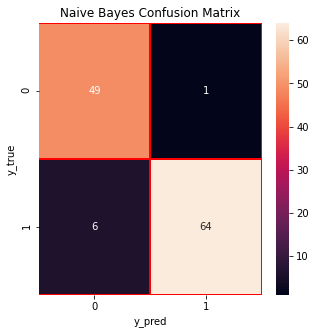

Naive Bayes accuracy = 94.16666666666667
Naive Bayes precision = 93.77622377622377
Naive Bayes sensitivity = 94.71428571428571
Naive Bayes recall = 94.71428571428571
Naive Bayes f1 score = 94.81481481481482


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print("Naive Bayes accuracy =",nb.score(x_test,y_test)*100)
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Naive Bayes")

print("Naive Bayes precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

In [ ]:
# Comparação da acurácia dos algoritmos: 

trace1 = {
  'x': algorithms,
  'y': score,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace1];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Accuracy of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
trace2 = {
  'x': algorithms,
  'y': precision,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace2];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Precision of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
trace4 = {
  'x': algorithms,
  'y': recall,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace4];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Recall of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
trace5 = {
  'x': algorithms,
  'y': f1score,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace5];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of F1 Scores of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

3ª Etapa- Incluir Redução de dimensionalidade: 
1. KNN 
2. Árvore de decisão 
3. SVM 
4. Rede Neural 
5. Naive Bayes 
6. Avaliar o desempenho de cada algoritmo (escolher a 


4ª Etapa- Aplicar balanceamento: 
1. KNN 
2. Árvore de decisão 
3. SVM 
4. Rede Neural 
5. Nave Bayes
6. Avaliar o desempenho de cada algoritmo (escolher a métrica) 
7. Realizar uma comparação entre os modelos classificadores. 


5ª Etapa- Ensemble boosting: 
1. Realizar combinação de três ou mais classificadores buscando um  desempenho melhor que a versão single dos classificadores 
2. Avaliar o desempenho de cada algoritmo (escolher a métrica) 
3. Realizar uma comparação entre os modelos classificadores.
